# Pytorch tutorial 

In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

### Tensors

Tensors constitute the basic object in pytorch, all operations are perform with tensors. 
We can perform similar methods and operation as with numpy arrays

In [2]:
a = torch.tensor([1,2, 0.2])
print(a)


tensor([1.0000, 2.0000, 0.2000])


In [3]:
b = torch.rand((5,3))
print(b)

tensor([[0.8722, 0.7162, 0.1539],
        [0.1089, 0.3894, 0.9336],
        [0.3918, 0.0927, 0.0288],
        [0.6690, 0.0690, 0.2639],
        [0.8621, 0.1490, 0.0329]])


In [4]:
c = torch.ones((5,3))
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [5]:
c = torch.ones_like(b)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [6]:
c.type(torch.float64)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [7]:
c.type(torch.bool)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [8]:
print(c.add(b))
print(c+b)

tensor([[1.8722, 1.7162, 1.1539],
        [1.1089, 1.3894, 1.9336],
        [1.3918, 1.0927, 1.0288],
        [1.6690, 1.0690, 1.2639],
        [1.8621, 1.1490, 1.0329]])
tensor([[1.8722, 1.7162, 1.1539],
        [1.1089, 1.3894, 1.9336],
        [1.3918, 1.0927, 1.0288],
        [1.6690, 1.0690, 1.2639],
        [1.8621, 1.1490, 1.0329]])


In [9]:
torch.matmul(c,b.transpose(0,1))

tensor([[1.7423, 1.4319, 0.5132, 1.0019, 1.0440],
        [1.7423, 1.4319, 0.5132, 1.0019, 1.0440],
        [1.7423, 1.4319, 0.5132, 1.0019, 1.0440],
        [1.7423, 1.4319, 0.5132, 1.0019, 1.0440],
        [1.7423, 1.4319, 0.5132, 1.0019, 1.0440]])

### Variables

In [10]:
from torch.autograd import Variable

In [11]:
W = Variable(torch.tensor([2,1,1,2,1], dtype = torch.float64), requires_grad = True) 
print(W)

tensor([2., 1., 1., 2., 1.], dtype=torch.float64, requires_grad=True)


In [12]:
''' Computations with W'''

z = W*W
z.retain_grad()
print(z)

tensor([4., 1., 1., 4., 1.], dtype=torch.float64, grad_fn=<MulBackward0>)


In [13]:
y = z.mean()
print(y)

tensor(2.2000, dtype=torch.float64, grad_fn=<MeanBackward0>)


 - We can compute the gradient of a function of variables.
 - In this case we can compute the gradient of y wrt W or z

In [14]:
# The backward method computes the gradients 
y.backward()

In [15]:
print(W.grad)

tensor([0.8000, 0.4000, 0.4000, 0.8000, 0.4000], dtype=torch.float64)


In [16]:
'''What happens if we do not retain gradient for z???'''

print(z.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000], dtype=torch.float64)


In [17]:
'''what happens if I compute the outer product of z'''

y = torch.matmul(z.reshape(5,1),z.reshape(1,5))
print(y)

tensor([[16.,  4.,  4., 16.,  4.],
        [ 4.,  1.,  1.,  4.,  1.],
        [ 4.,  1.,  1.,  4.,  1.],
        [16.,  4.,  4., 16.,  4.],
        [ 4.,  1.,  1.,  4.,  1.]], dtype=torch.float64, grad_fn=<MmBackward>)


In [18]:
'''Is it able to compute the jacobian??'''
# y.backward()

# t = y[1,1]

# # t is z2*z2 and z2=1, what should be the gradient of t wrt z???

# t.backward()
# print(z.grad)

'Is it able to compute the jacobian??'

# Linear Regression with autograd

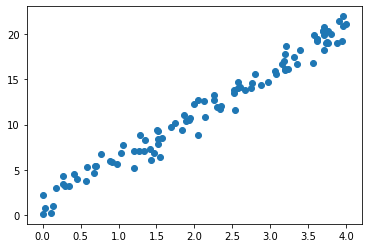

In [19]:
'''Let's try gradient descent for a regression problem

y = wx + b

'''

# Create some data

x = np.random.uniform(low=0, high=4, size=100)
noise = np.random.normal(0,1,(1,len(x)))
y = 5*x + 1 + noise

x = torch.from_numpy(x)
y = torch.from_numpy(y)

plt.scatter(x,y)

In [20]:
# define our variables w and b (y = wx + b)

w = Variable(torch.tensor(0).float(), requires_grad = True)
b = Variable(torch.tensor(0).float(), requires_grad = True)

errors = y - x*w - b
loss = torch.mean(torch.pow(errors,2))

In [21]:
print(loss)

tensor(176.1616, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [22]:

loss.backward()


In [23]:
'''Print the gradients'''
print(w.grad)
print(b.grad)

tensor(-65.7091)
tensor(-23.7169)


In [24]:
'''How to perform gradient descent??'''

# The updates (steps) are going to be performed by an optimizer
optimizer = torch.optim.SGD([w,b], lr=0.001, momentum=0.9)

In [25]:
n_steps = 1000
for i in range(n_steps):
    errors = y - x*w - b
    loss = torch.mean(torch.pow(errors,2))
    optimizer.zero_grad()
    print(loss)
    loss.backward()
    optimizer.step()
    
    
    

tensor(176.1616, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(171.3154, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(162.3601, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(150.1533, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(135.6008, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(119.5954, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(102.9688, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(86.4566, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(70.6742, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(56.1050, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(43.0978, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(31.8714, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(22.5263, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(15.0600, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(9.3851, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(5.3489, dtype=torch.float64, grad_fn=<MeanBackward0>)
ten

tensor(0.9369, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9368, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9367, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9366, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9365, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9364, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9363, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9363, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9362, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9361, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9360, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9359, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9358, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9357, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9356, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9355, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9354, dtype=tor

tensor(0.9292, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9292, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9291, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9291, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9291, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9291, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9290, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9290, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9290, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9290, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9289, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9289, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9289, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9289, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9288, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9288, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9288, dtype=tor

tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9268, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9267, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9267, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9267, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9267, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9267, dtype=tor

tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9262, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9261, dtype=tor

tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=tor

tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9260, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.9259, dtype=tor

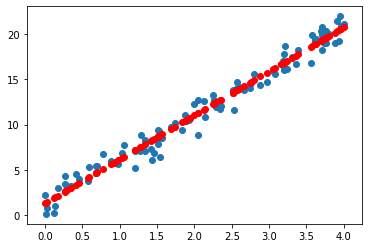

In [26]:
y_hat = x*w + b
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

# Neural Networks in pytorch 

- All neural networks are going to be subclasses of nn.Module parent class 

In [27]:
import torch.nn as nn
import torch.nn.functional as F

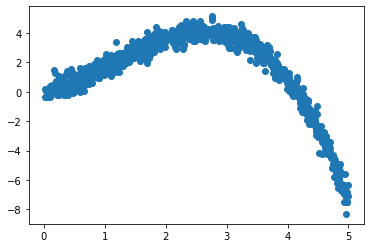

In [28]:
# Create some data

x = np.random.uniform(low=0, high=5, size=1000)
noise = np.random.normal(0,0.4,(1,len(x)))
y = x**2 - 0.3*x**3 + x + noise
x = Variable(torch.from_numpy(x.reshape(1000,1)).float())
y = torch.from_numpy(y.reshape(1000,1)).float()

plt.scatter(x,y)

In [29]:
LayerL = nn.Linear(30,50)
print(LayerL)
DropoutL = nn.Dropout(p = 0.5)
print(DropoutL)
ConvL = nn.Conv1d(1,10, 5)
print(ConvL)
print(LayerL.weight)
print(LayerL.weight.shape)

# 'Input a tensor of size 30'
ten1=  torch.randn(30)
print(LayerL(ten1))

Linear(in_features=30, out_features=50, bias=True)
Dropout(p=0.5, inplace=False)
Conv1d(1, 10, kernel_size=(5,), stride=(1,))
Parameter containing:
tensor([[ 0.0973, -0.1618,  0.0638,  ...,  0.1098, -0.1087, -0.1555],
        [-0.0191, -0.1371,  0.1287,  ...,  0.1560,  0.0258, -0.0412],
        [ 0.1678,  0.1382, -0.1493,  ..., -0.1548,  0.1686, -0.1160],
        ...,
        [-0.0129,  0.0578,  0.1264,  ...,  0.0038,  0.1762, -0.0865],
        [ 0.0476, -0.0399, -0.0169,  ...,  0.0831, -0.0549, -0.0724],
        [ 0.1032,  0.0884,  0.1244,  ...,  0.0741, -0.1105,  0.1445]],
       requires_grad=True)
torch.Size([50, 30])
tensor([-0.2479, -0.5797,  0.9458, -0.0392, -0.5523, -0.0887,  0.3863,  0.3912,
         0.2683,  0.3840,  0.2079,  0.2921, -0.4398, -0.1898,  0.1628,  0.1964,
         0.7162, -0.4707, -0.3674, -0.0709,  0.4086, -0.0426, -1.0197,  0.2136,
         0.0225, -0.3518, -0.1317,  0.2202, -0.0911, -0.5621, -1.1781,  0.3147,
        -0.8621, -0.7073, -0.0066,  0.5041, -0.536

In [30]:
'''What happens if we use dropout???'''
print(DropoutL(LayerL(ten1)))

tensor([-0.4959, -0.0000,  0.0000, -0.0785, -0.0000, -0.1775,  0.0000,  0.0000,
         0.0000,  0.7679,  0.0000,  0.5843, -0.8796, -0.3796,  0.3257,  0.3927,
         0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.0853, -0.0000,  0.0000,
         0.0000, -0.7035, -0.0000,  0.4403, -0.0000, -0.0000, -2.3563,  0.0000,
        -1.7242, -0.0000, -0.0000,  1.0083, -1.0724,  1.9290,  0.0000, -1.9862,
         0.5159,  0.0000, -1.3638, -0.3251,  1.1837,  1.3781, -0.2828, -0.0000,
         0.0000, -0.0000], grad_fn=<MulBackward0>)


In [31]:
class MyNN_Linear(nn.Module):
    def __init__(self, input_size, hidden_neurons, output_size):
        super().__init__()
        self.Layer1 = nn.Linear(input_size, hidden_neurons)
        self.Layer2 = nn.Linear(hidden_neurons, output_size)
    def forward(self, X):
        hidden_activations = self.Layer1(X)
        output = self.Layer2(hidden_activations)
        return output        

In [32]:
'''What are the dimensions of our network??'''
Net1 = MyNN_Linear(1, 50, 1)

In [33]:
'''Define the loss function
- Pytorch has multiple already build in loss functions (You can create your own as well)
- Since we want to do regression we can use nn.MSELoss() or nn.L1Loss
'''
LossMSE = nn.MSELoss(reduction = "mean")
LossL1 = nn.L1Loss(reduction = "mean")


In [34]:
'''We need and optimizer as well, which is going to perform gradient descent'''
# I am using SGD, you can try Adam or others

optimizer = torch.optim.Adam(Net1.parameters(), lr=0.01)

In [35]:
''' Now we can train our network'''
# Our training data is x, our tagets are y, and our Neural netowrk will perform the forward pass automatically
n_steps = 200
for i in range(n_steps):
    outN = Net1(x)
    loss = LossMSE(outN, y)
    optimizer.zero_grad()
    print(loss)
    loss.backward()
    optimizer.step()
    

tensor(12.8379, grad_fn=<MseLossBackward>)
tensor(10.1050, grad_fn=<MseLossBackward>)
tensor(8.7791, grad_fn=<MseLossBackward>)
tensor(8.5404, grad_fn=<MseLossBackward>)
tensor(8.8178, grad_fn=<MseLossBackward>)
tensor(9.0547, grad_fn=<MseLossBackward>)
tensor(8.9907, grad_fn=<MseLossBackward>)
tensor(8.6481, grad_fn=<MseLossBackward>)
tensor(8.1670, grad_fn=<MseLossBackward>)
tensor(7.6952, grad_fn=<MseLossBackward>)
tensor(7.3389, grad_fn=<MseLossBackward>)
tensor(7.1428, grad_fn=<MseLossBackward>)
tensor(7.0867, grad_fn=<MseLossBackward>)
tensor(7.1012, grad_fn=<MseLossBackward>)
tensor(7.1030, grad_fn=<MseLossBackward>)
tensor(7.0354, grad_fn=<MseLossBackward>)
tensor(6.8882, grad_fn=<MseLossBackward>)
tensor(6.6920, grad_fn=<MseLossBackward>)
tensor(6.4966, grad_fn=<MseLossBackward>)
tensor(6.3479, grad_fn=<MseLossBackward>)
tensor(6.2694, grad_fn=<MseLossBackward>)
tensor(6.2546, grad_fn=<MseLossBackward>)
tensor(6.2722, grad_fn=<MseLossBackward>)
tensor(6.2833, grad_fn=<MseLossB

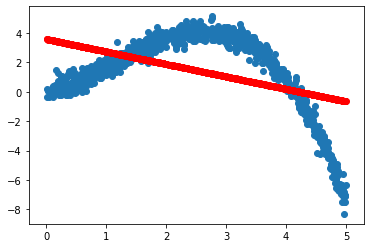

In [36]:
y_hat = Net1(x)
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

In [37]:
''' Now we can train our network'''
# Our training data is x, our tagets are y, and our Neural netowrk will perform the forward pass automatically
n_steps = 1000
for i in range(n_steps):
    outN = Net1(x)
    loss = LossL1(outN, y)
    optimizer.zero_grad()
    print(loss)
    loss.backward()
    optimizer.step()

tensor(2.1035, grad_fn=<L1LossBackward>)
tensor(2.1002, grad_fn=<L1LossBackward>)
tensor(2.0943, grad_fn=<L1LossBackward>)
tensor(2.0871, grad_fn=<L1LossBackward>)
tensor(2.0793, grad_fn=<L1LossBackward>)
tensor(2.0718, grad_fn=<L1LossBackward>)
tensor(2.0647, grad_fn=<L1LossBackward>)
tensor(2.0589, grad_fn=<L1LossBackward>)
tensor(2.0550, grad_fn=<L1LossBackward>)
tensor(2.0528, grad_fn=<L1LossBackward>)
tensor(2.0521, grad_fn=<L1LossBackward>)
tensor(2.0523, grad_fn=<L1LossBackward>)
tensor(2.0533, grad_fn=<L1LossBackward>)
tensor(2.0542, grad_fn=<L1LossBackward>)
tensor(2.0551, grad_fn=<L1LossBackward>)
tensor(2.0556, grad_fn=<L1LossBackward>)
tensor(2.0555, grad_fn=<L1LossBackward>)
tensor(2.0549, grad_fn=<L1LossBackward>)
tensor(2.0538, grad_fn=<L1LossBackward>)
tensor(2.0523, grad_fn=<L1LossBackward>)
tensor(2.0506, grad_fn=<L1LossBackward>)
tensor(2.0485, grad_fn=<L1LossBackward>)
tensor(2.0464, grad_fn=<L1LossBackward>)
tensor(2.0448, grad_fn=<L1LossBackward>)
tensor(2.0434, g

tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, g

tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, g

tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, g

tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, grad_fn=<L1LossBackward>)
tensor(2.0336, g

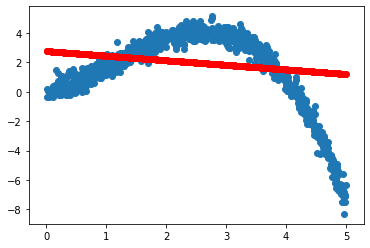

In [38]:
y_hat = Net1(x)
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

In [39]:
''' We are getting a linear function, what can we do?'''

class MyNN_NOLinear(nn.Module):
    def __init__(self, input_size, hidden_neurons, hidden_neurons2, output_size):
        super().__init__()
        self.Layer1 = nn.Linear(input_size, hidden_neurons)
        self.Layer2 = nn.Linear(hidden_neurons, hidden_neurons2)
#         self.Layer21 = nn.Linear(hidden_neurons, hidden_neurons)
#         self.Layer22 = nn.Linear(hidden_neurons, hidden_neurons)
        self.Layer3 = nn.Linear(hidden_neurons2, output_size)
    def forward(self, X):
        # adding non-linearities in the neurons (F.relu)
        hidden_activations = F.relu(self.Layer1(X))
        hidden_activations = F.relu(self.Layer2(hidden_activations))
#         hidden_activations = F.relu(self.Layer21(hidden_activations))
#         hidden_activations = F.relu(self.Layer22(hidden_activations))
        output = self.Layer3(hidden_activations)
        return output       


In [40]:
Net2 = MyNN_NOLinear(1, 50, 100, 1)
optimizer = torch.optim.Adam(Net2.parameters(), lr=0.001, weight_decay=0.01)

In [41]:
''' Non-linear network training'''

n_steps = 100
for i in range(n_steps):
    outN = Net2(x)
    loss = LossMSE(outN, y)
    optimizer.zero_grad()
    print(loss)
    loss.backward()
    optimizer.step()

tensor(9.4496, grad_fn=<MseLossBackward>)
tensor(9.2524, grad_fn=<MseLossBackward>)
tensor(9.0828, grad_fn=<MseLossBackward>)
tensor(8.9354, grad_fn=<MseLossBackward>)
tensor(8.8085, grad_fn=<MseLossBackward>)
tensor(8.7061, grad_fn=<MseLossBackward>)
tensor(8.6237, grad_fn=<MseLossBackward>)
tensor(8.5544, grad_fn=<MseLossBackward>)
tensor(8.4933, grad_fn=<MseLossBackward>)
tensor(8.4365, grad_fn=<MseLossBackward>)
tensor(8.3771, grad_fn=<MseLossBackward>)
tensor(8.3159, grad_fn=<MseLossBackward>)
tensor(8.2592, grad_fn=<MseLossBackward>)
tensor(8.1981, grad_fn=<MseLossBackward>)
tensor(8.1335, grad_fn=<MseLossBackward>)
tensor(8.0660, grad_fn=<MseLossBackward>)
tensor(7.9961, grad_fn=<MseLossBackward>)
tensor(7.9235, grad_fn=<MseLossBackward>)
tensor(7.8503, grad_fn=<MseLossBackward>)
tensor(7.7813, grad_fn=<MseLossBackward>)
tensor(7.7152, grad_fn=<MseLossBackward>)
tensor(7.6535, grad_fn=<MseLossBackward>)
tensor(7.5905, grad_fn=<MseLossBackward>)
tensor(7.5263, grad_fn=<MseLossBac

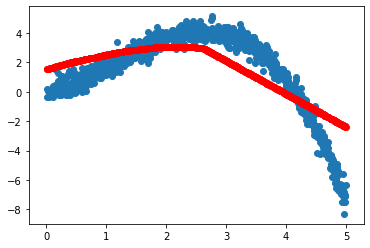

In [42]:
y_hat = Net2(x)
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

In [43]:
''' DataLoader to create mini-batches'''

class MyDataset(torch.utils.data.Dataset):
  def __init__(self, data, targets):
        self.targets = targets
        self.data = data

  def __len__(self):
    # computes the length of the data
        return len(self.data)
    
  def __getitem__(self, index):
    # outputs of this function are the ones getting out in the dataloader (in this case X and y)
        X = self.data[index]
        y = self.targets[index]
        return X, y


In [44]:
training_set = MyDataset(x, y)
# now that training_set is a pytorch Dataset we can feed it to the DataLoader:
training_generator = torch.utils.data.DataLoader(training_set, batch_size=200)

In [45]:
''' Non-linear network training'''

n_epochs= 1000
for i in range(n_epochs):
    for Xb,yb in training_generator:
        outN = Net2(Xb)
        loss = LossMSE(outN, yb)
        optimizer.zero_grad()
        print(loss)
        loss.backward()
        optimizer.step()

tensor(2.3664, grad_fn=<MseLossBackward>)
tensor(2.5016, grad_fn=<MseLossBackward>)
tensor(2.1917, grad_fn=<MseLossBackward>)
tensor(2.8030, grad_fn=<MseLossBackward>)
tensor(2.4309, grad_fn=<MseLossBackward>)
tensor(2.1651, grad_fn=<MseLossBackward>)
tensor(2.2929, grad_fn=<MseLossBackward>)
tensor(1.9989, grad_fn=<MseLossBackward>)
tensor(2.5705, grad_fn=<MseLossBackward>)
tensor(2.2103, grad_fn=<MseLossBackward>)
tensor(1.9576, grad_fn=<MseLossBackward>)
tensor(2.0840, grad_fn=<MseLossBackward>)
tensor(1.8140, grad_fn=<MseLossBackward>)
tensor(2.3264, grad_fn=<MseLossBackward>)
tensor(2.0172, grad_fn=<MseLossBackward>)
tensor(1.7727, grad_fn=<MseLossBackward>)
tensor(1.8919, grad_fn=<MseLossBackward>)
tensor(1.6390, grad_fn=<MseLossBackward>)
tensor(2.1236, grad_fn=<MseLossBackward>)
tensor(1.8223, grad_fn=<MseLossBackward>)
tensor(1.5924, grad_fn=<MseLossBackward>)
tensor(1.7107, grad_fn=<MseLossBackward>)
tensor(1.4794, grad_fn=<MseLossBackward>)
tensor(1.9077, grad_fn=<MseLossBac

tensor(0.2764, grad_fn=<MseLossBackward>)
tensor(0.2417, grad_fn=<MseLossBackward>)
tensor(0.2652, grad_fn=<MseLossBackward>)
tensor(0.2392, grad_fn=<MseLossBackward>)
tensor(0.2582, grad_fn=<MseLossBackward>)
tensor(0.2730, grad_fn=<MseLossBackward>)
tensor(0.2387, grad_fn=<MseLossBackward>)
tensor(0.2623, grad_fn=<MseLossBackward>)
tensor(0.2367, grad_fn=<MseLossBackward>)
tensor(0.2548, grad_fn=<MseLossBackward>)
tensor(0.2694, grad_fn=<MseLossBackward>)
tensor(0.2362, grad_fn=<MseLossBackward>)
tensor(0.2599, grad_fn=<MseLossBackward>)
tensor(0.2341, grad_fn=<MseLossBackward>)
tensor(0.2518, grad_fn=<MseLossBackward>)
tensor(0.2658, grad_fn=<MseLossBackward>)
tensor(0.2336, grad_fn=<MseLossBackward>)
tensor(0.2574, grad_fn=<MseLossBackward>)
tensor(0.2314, grad_fn=<MseLossBackward>)
tensor(0.2490, grad_fn=<MseLossBackward>)
tensor(0.2626, grad_fn=<MseLossBackward>)
tensor(0.2309, grad_fn=<MseLossBackward>)
tensor(0.2551, grad_fn=<MseLossBackward>)
tensor(0.2291, grad_fn=<MseLossBac

tensor(0.2064, grad_fn=<MseLossBackward>)
tensor(0.2126, grad_fn=<MseLossBackward>)
tensor(0.1887, grad_fn=<MseLossBackward>)
tensor(0.2155, grad_fn=<MseLossBackward>)
tensor(0.1928, grad_fn=<MseLossBackward>)
tensor(0.2057, grad_fn=<MseLossBackward>)
tensor(0.2120, grad_fn=<MseLossBackward>)
tensor(0.1882, grad_fn=<MseLossBackward>)
tensor(0.2151, grad_fn=<MseLossBackward>)
tensor(0.1925, grad_fn=<MseLossBackward>)
tensor(0.2052, grad_fn=<MseLossBackward>)
tensor(0.2114, grad_fn=<MseLossBackward>)
tensor(0.1876, grad_fn=<MseLossBackward>)
tensor(0.2145, grad_fn=<MseLossBackward>)
tensor(0.1921, grad_fn=<MseLossBackward>)
tensor(0.2048, grad_fn=<MseLossBackward>)
tensor(0.2108, grad_fn=<MseLossBackward>)
tensor(0.1871, grad_fn=<MseLossBackward>)
tensor(0.2141, grad_fn=<MseLossBackward>)
tensor(0.1916, grad_fn=<MseLossBackward>)
tensor(0.2043, grad_fn=<MseLossBackward>)
tensor(0.2101, grad_fn=<MseLossBackward>)
tensor(0.1866, grad_fn=<MseLossBackward>)
tensor(0.2137, grad_fn=<MseLossBac

tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1956, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.2041, grad_fn=<MseLossBackward>)
tensor(0.1825, grad_fn=<MseLossBackward>)
tensor(0.1938, grad_fn=<MseLossBackward>)
tensor(0.1954, grad_fn=<MseLossBackward>)
tensor(0.1738, grad_fn=<MseLossBackward>)
tensor(0.2039, grad_fn=<MseLossBackward>)
tensor(0.1824, grad_fn=<MseLossBackward>)
tensor(0.1936, grad_fn=<MseLossBackward>)
tensor(0.1952, grad_fn=<MseLossBackward>)
tensor(0.1737, grad_fn=<MseLossBackward>)
tensor(0.2038, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1934, grad_fn=<MseLossBackward>)
tensor(0.1950, grad_fn=<MseLossBackward>)
tensor(0.1736, grad_fn=<MseLossBackward>)
tensor(0.2038, grad_fn=<MseLossBackward>)
tensor(0.1822, grad_fn=<MseLossBackward>)
tensor(0.1935, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1733, grad_fn=<MseLossBackward>)
tensor(0.2037, grad_fn=<MseLossBac

tensor(0.1893, grad_fn=<MseLossBackward>)
tensor(0.1893, grad_fn=<MseLossBackward>)
tensor(0.1687, grad_fn=<MseLossBackward>)
tensor(0.2006, grad_fn=<MseLossBackward>)
tensor(0.1793, grad_fn=<MseLossBackward>)
tensor(0.1893, grad_fn=<MseLossBackward>)
tensor(0.1893, grad_fn=<MseLossBackward>)
tensor(0.1687, grad_fn=<MseLossBackward>)
tensor(0.2007, grad_fn=<MseLossBackward>)
tensor(0.1793, grad_fn=<MseLossBackward>)
tensor(0.1892, grad_fn=<MseLossBackward>)
tensor(0.1892, grad_fn=<MseLossBackward>)
tensor(0.1686, grad_fn=<MseLossBackward>)
tensor(0.2006, grad_fn=<MseLossBackward>)
tensor(0.1792, grad_fn=<MseLossBackward>)
tensor(0.1893, grad_fn=<MseLossBackward>)
tensor(0.1892, grad_fn=<MseLossBackward>)
tensor(0.1686, grad_fn=<MseLossBackward>)
tensor(0.2007, grad_fn=<MseLossBackward>)
tensor(0.1792, grad_fn=<MseLossBackward>)
tensor(0.1892, grad_fn=<MseLossBackward>)
tensor(0.1891, grad_fn=<MseLossBackward>)
tensor(0.1686, grad_fn=<MseLossBackward>)
tensor(0.2006, grad_fn=<MseLossBac

tensor(0.1660, grad_fn=<MseLossBackward>)
tensor(0.1991, grad_fn=<MseLossBackward>)
tensor(0.1776, grad_fn=<MseLossBackward>)
tensor(0.1876, grad_fn=<MseLossBackward>)
tensor(0.1861, grad_fn=<MseLossBackward>)
tensor(0.1659, grad_fn=<MseLossBackward>)
tensor(0.1990, grad_fn=<MseLossBackward>)
tensor(0.1776, grad_fn=<MseLossBackward>)
tensor(0.1875, grad_fn=<MseLossBackward>)
tensor(0.1860, grad_fn=<MseLossBackward>)
tensor(0.1658, grad_fn=<MseLossBackward>)
tensor(0.1989, grad_fn=<MseLossBackward>)
tensor(0.1776, grad_fn=<MseLossBackward>)
tensor(0.1874, grad_fn=<MseLossBackward>)
tensor(0.1860, grad_fn=<MseLossBackward>)
tensor(0.1658, grad_fn=<MseLossBackward>)
tensor(0.1989, grad_fn=<MseLossBackward>)
tensor(0.1775, grad_fn=<MseLossBackward>)
tensor(0.1874, grad_fn=<MseLossBackward>)
tensor(0.1859, grad_fn=<MseLossBackward>)
tensor(0.1658, grad_fn=<MseLossBackward>)
tensor(0.1989, grad_fn=<MseLossBackward>)
tensor(0.1775, grad_fn=<MseLossBackward>)
tensor(0.1875, grad_fn=<MseLossBac

tensor(0.1986, grad_fn=<MseLossBackward>)
tensor(0.1768, grad_fn=<MseLossBackward>)
tensor(0.1870, grad_fn=<MseLossBackward>)
tensor(0.1844, grad_fn=<MseLossBackward>)
tensor(0.1647, grad_fn=<MseLossBackward>)
tensor(0.1987, grad_fn=<MseLossBackward>)
tensor(0.1768, grad_fn=<MseLossBackward>)
tensor(0.1869, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1646, grad_fn=<MseLossBackward>)
tensor(0.1986, grad_fn=<MseLossBackward>)
tensor(0.1768, grad_fn=<MseLossBackward>)
tensor(0.1865, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1646, grad_fn=<MseLossBackward>)
tensor(0.1985, grad_fn=<MseLossBackward>)
tensor(0.1768, grad_fn=<MseLossBackward>)
tensor(0.1865, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1645, grad_fn=<MseLossBackward>)
tensor(0.1984, grad_fn=<MseLossBackward>)
tensor(0.1768, grad_fn=<MseLossBackward>)
tensor(0.1865, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBac

tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1860, grad_fn=<MseLossBackward>)
tensor(0.1828, grad_fn=<MseLossBackward>)
tensor(0.1637, grad_fn=<MseLossBackward>)
tensor(0.1982, grad_fn=<MseLossBackward>)
tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1859, grad_fn=<MseLossBackward>)
tensor(0.1828, grad_fn=<MseLossBackward>)
tensor(0.1637, grad_fn=<MseLossBackward>)
tensor(0.1982, grad_fn=<MseLossBackward>)
tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1859, grad_fn=<MseLossBackward>)
tensor(0.1828, grad_fn=<MseLossBackward>)
tensor(0.1636, grad_fn=<MseLossBackward>)
tensor(0.1981, grad_fn=<MseLossBackward>)
tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1858, grad_fn=<MseLossBackward>)
tensor(0.1827, grad_fn=<MseLossBackward>)
tensor(0.1636, grad_fn=<MseLossBackward>)
tensor(0.1981, grad_fn=<MseLossBackward>)
tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1858, grad_fn=<MseLossBackward>)
tensor(0.1827, grad_fn=<MseLossBackward>)
tensor(0.1636, grad_fn=<MseLossBac

tensor(0.1856, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1629, grad_fn=<MseLossBackward>)
tensor(0.1978, grad_fn=<MseLossBackward>)
tensor(0.1759, grad_fn=<MseLossBackward>)
tensor(0.1851, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1629, grad_fn=<MseLossBackward>)
tensor(0.1976, grad_fn=<MseLossBackward>)
tensor(0.1759, grad_fn=<MseLossBackward>)
tensor(0.1850, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1628, grad_fn=<MseLossBackward>)
tensor(0.1976, grad_fn=<MseLossBackward>)
tensor(0.1759, grad_fn=<MseLossBackward>)
tensor(0.1850, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1629, grad_fn=<MseLossBackward>)
tensor(0.1976, grad_fn=<MseLossBackward>)
tensor(0.1759, grad_fn=<MseLossBackward>)
tensor(0.1852, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1629, grad_fn=<MseLossBackward>)
tensor(0.1976, grad_fn=<MseLossBac

tensor(0.1973, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1848, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBackward>)
tensor(0.1622, grad_fn=<MseLossBackward>)
tensor(0.1974, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1847, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBackward>)
tensor(0.1622, grad_fn=<MseLossBackward>)
tensor(0.1973, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1847, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBackward>)
tensor(0.1622, grad_fn=<MseLossBackward>)
tensor(0.1973, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1847, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBackward>)
tensor(0.1622, grad_fn=<MseLossBackward>)
tensor(0.1973, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1847, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBac

tensor(0.1791, grad_fn=<MseLossBackward>)
tensor(0.1616, grad_fn=<MseLossBackward>)
tensor(0.1969, grad_fn=<MseLossBackward>)
tensor(0.1752, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1791, grad_fn=<MseLossBackward>)
tensor(0.1616, grad_fn=<MseLossBackward>)
tensor(0.1969, grad_fn=<MseLossBackward>)
tensor(0.1752, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1790, grad_fn=<MseLossBackward>)
tensor(0.1616, grad_fn=<MseLossBackward>)
tensor(0.1969, grad_fn=<MseLossBackward>)
tensor(0.1752, grad_fn=<MseLossBackward>)
tensor(0.1842, grad_fn=<MseLossBackward>)
tensor(0.1790, grad_fn=<MseLossBackward>)
tensor(0.1616, grad_fn=<MseLossBackward>)
tensor(0.1969, grad_fn=<MseLossBackward>)
tensor(0.1752, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1790, grad_fn=<MseLossBackward>)
tensor(0.1616, grad_fn=<MseLossBackward>)
tensor(0.1969, grad_fn=<MseLossBackward>)
tensor(0.1752, grad_fn=<MseLossBac

tensor(0.1779, grad_fn=<MseLossBackward>)
tensor(0.1611, grad_fn=<MseLossBackward>)
tensor(0.1966, grad_fn=<MseLossBackward>)
tensor(0.1749, grad_fn=<MseLossBackward>)
tensor(0.1838, grad_fn=<MseLossBackward>)
tensor(0.1779, grad_fn=<MseLossBackward>)
tensor(0.1610, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)
tensor(0.1749, grad_fn=<MseLossBackward>)
tensor(0.1836, grad_fn=<MseLossBackward>)
tensor(0.1778, grad_fn=<MseLossBackward>)
tensor(0.1610, grad_fn=<MseLossBackward>)
tensor(0.1964, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1835, grad_fn=<MseLossBackward>)
tensor(0.1778, grad_fn=<MseLossBackward>)
tensor(0.1610, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1836, grad_fn=<MseLossBackward>)
tensor(0.1778, grad_fn=<MseLossBackward>)
tensor(0.1610, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBac

tensor(0.1829, grad_fn=<MseLossBackward>)
tensor(0.1766, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1960, grad_fn=<MseLossBackward>)
tensor(0.1744, grad_fn=<MseLossBackward>)
tensor(0.1829, grad_fn=<MseLossBackward>)
tensor(0.1766, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1960, grad_fn=<MseLossBackward>)
tensor(0.1744, grad_fn=<MseLossBackward>)
tensor(0.1829, grad_fn=<MseLossBackward>)
tensor(0.1766, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1961, grad_fn=<MseLossBackward>)
tensor(0.1744, grad_fn=<MseLossBackward>)
tensor(0.1830, grad_fn=<MseLossBackward>)
tensor(0.1765, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1960, grad_fn=<MseLossBackward>)
tensor(0.1744, grad_fn=<MseLossBackward>)
tensor(0.1830, grad_fn=<MseLossBackward>)
tensor(0.1765, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1961, grad_fn=<MseLossBac

tensor(0.1741, grad_fn=<MseLossBackward>)
tensor(0.1821, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBackward>)
tensor(0.1955, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1822, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBackward>)
tensor(0.1956, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBackward>)
tensor(0.1956, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1754, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBackward>)
tensor(0.1956, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1824, grad_fn=<MseLossBackward>)
tensor(0.1754, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBac

tensor(0.1824, grad_fn=<MseLossBackward>)
tensor(0.1749, grad_fn=<MseLossBackward>)
tensor(0.1590, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1733, grad_fn=<MseLossBackward>)
tensor(0.1825, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1589, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1733, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1589, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1734, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1589, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1733, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.1748, grad_fn=<MseLossBackward>)
tensor(0.1589, grad_fn=<MseLossBackward>)
tensor(0.1949, grad_fn=<MseLossBac

tensor(0.1583, grad_fn=<MseLossBackward>)
tensor(0.1949, grad_fn=<MseLossBackward>)
tensor(0.1732, grad_fn=<MseLossBackward>)
tensor(0.1818, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1582, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1733, grad_fn=<MseLossBackward>)
tensor(0.1818, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1582, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1732, grad_fn=<MseLossBackward>)
tensor(0.1817, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1582, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1732, grad_fn=<MseLossBackward>)
tensor(0.1818, grad_fn=<MseLossBackward>)
tensor(0.1739, grad_fn=<MseLossBackward>)
tensor(0.1582, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1732, grad_fn=<MseLossBackward>)
tensor(0.1817, grad_fn=<MseLossBac

tensor(0.1816, grad_fn=<MseLossBackward>)
tensor(0.1735, grad_fn=<MseLossBackward>)
tensor(0.1577, grad_fn=<MseLossBackward>)
tensor(0.1944, grad_fn=<MseLossBackward>)
tensor(0.1730, grad_fn=<MseLossBackward>)
tensor(0.1817, grad_fn=<MseLossBackward>)
tensor(0.1735, grad_fn=<MseLossBackward>)
tensor(0.1577, grad_fn=<MseLossBackward>)
tensor(0.1945, grad_fn=<MseLossBackward>)
tensor(0.1730, grad_fn=<MseLossBackward>)
tensor(0.1816, grad_fn=<MseLossBackward>)
tensor(0.1734, grad_fn=<MseLossBackward>)
tensor(0.1576, grad_fn=<MseLossBackward>)
tensor(0.1944, grad_fn=<MseLossBackward>)
tensor(0.1730, grad_fn=<MseLossBackward>)
tensor(0.1815, grad_fn=<MseLossBackward>)
tensor(0.1734, grad_fn=<MseLossBackward>)
tensor(0.1576, grad_fn=<MseLossBackward>)
tensor(0.1943, grad_fn=<MseLossBackward>)
tensor(0.1730, grad_fn=<MseLossBackward>)
tensor(0.1814, grad_fn=<MseLossBackward>)
tensor(0.1734, grad_fn=<MseLossBackward>)
tensor(0.1576, grad_fn=<MseLossBackward>)
tensor(0.1944, grad_fn=<MseLossBac

tensor(0.1812, grad_fn=<MseLossBackward>)
tensor(0.1730, grad_fn=<MseLossBackward>)
tensor(0.1572, grad_fn=<MseLossBackward>)
tensor(0.1941, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1813, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1572, grad_fn=<MseLossBackward>)
tensor(0.1942, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1811, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1571, grad_fn=<MseLossBackward>)
tensor(0.1941, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1811, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1570, grad_fn=<MseLossBackward>)
tensor(0.1941, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1812, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1571, grad_fn=<MseLossBackward>)
tensor(0.1941, grad_fn=<MseLossBac

tensor(0.1567, grad_fn=<MseLossBackward>)
tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1808, grad_fn=<MseLossBackward>)
tensor(0.1725, grad_fn=<MseLossBackward>)
tensor(0.1567, grad_fn=<MseLossBackward>)
tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1809, grad_fn=<MseLossBackward>)
tensor(0.1724, grad_fn=<MseLossBackward>)
tensor(0.1567, grad_fn=<MseLossBackward>)
tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1809, grad_fn=<MseLossBackward>)
tensor(0.1724, grad_fn=<MseLossBackward>)
tensor(0.1567, grad_fn=<MseLossBackward>)
tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1808, grad_fn=<MseLossBackward>)
tensor(0.1724, grad_fn=<MseLossBackward>)
tensor(0.1566, grad_fn=<MseLossBackward>)
tensor(0.1939, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1807, grad_fn=<MseLossBac

tensor(0.1563, grad_fn=<MseLossBackward>)
tensor(0.1936, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1804, grad_fn=<MseLossBackward>)
tensor(0.1720, grad_fn=<MseLossBackward>)
tensor(0.1562, grad_fn=<MseLossBackward>)
tensor(0.1936, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1805, grad_fn=<MseLossBackward>)
tensor(0.1721, grad_fn=<MseLossBackward>)
tensor(0.1563, grad_fn=<MseLossBackward>)
tensor(0.1937, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1805, grad_fn=<MseLossBackward>)
tensor(0.1720, grad_fn=<MseLossBackward>)
tensor(0.1563, grad_fn=<MseLossBackward>)
tensor(0.1937, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1804, grad_fn=<MseLossBackward>)
tensor(0.1720, grad_fn=<MseLossBackward>)
tensor(0.1563, grad_fn=<MseLossBackward>)
tensor(0.1936, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1804, grad_fn=<MseLossBac

tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1802, grad_fn=<MseLossBackward>)
tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.1559, grad_fn=<MseLossBackward>)
tensor(0.1934, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1803, grad_fn=<MseLossBackward>)
tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.1559, grad_fn=<MseLossBackward>)
tensor(0.1934, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1801, grad_fn=<MseLossBackward>)
tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.1559, grad_fn=<MseLossBackward>)
tensor(0.1934, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1802, grad_fn=<MseLossBackward>)
tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.1559, grad_fn=<MseLossBackward>)
tensor(0.1934, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1802, grad_fn=<MseLossBackward>)
tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.1559, grad_fn=<MseLossBac

tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1799, grad_fn=<MseLossBackward>)
tensor(0.1715, grad_fn=<MseLossBackward>)
tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1800, grad_fn=<MseLossBackward>)
tensor(0.1715, grad_fn=<MseLossBackward>)
tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1800, grad_fn=<MseLossBackward>)
tensor(0.1715, grad_fn=<MseLossBackward>)
tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1799, grad_fn=<MseLossBackward>)
tensor(0.1715, grad_fn=<MseLossBackward>)
tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1800, grad_fn=<MseLossBac

tensor(0.1930, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1797, grad_fn=<MseLossBackward>)
tensor(0.1712, grad_fn=<MseLossBackward>)
tensor(0.1553, grad_fn=<MseLossBackward>)
tensor(0.1930, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1796, grad_fn=<MseLossBackward>)
tensor(0.1712, grad_fn=<MseLossBackward>)
tensor(0.1553, grad_fn=<MseLossBackward>)
tensor(0.1929, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1796, grad_fn=<MseLossBackward>)
tensor(0.1712, grad_fn=<MseLossBackward>)
tensor(0.1553, grad_fn=<MseLossBackward>)
tensor(0.1929, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1795, grad_fn=<MseLossBackward>)
tensor(0.1712, grad_fn=<MseLossBackward>)
tensor(0.1553, grad_fn=<MseLossBackward>)
tensor(0.1929, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1797, grad_fn=<MseLossBackward>)
tensor(0.1712, grad_fn=<MseLossBac

tensor(0.1928, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1794, grad_fn=<MseLossBackward>)
tensor(0.1710, grad_fn=<MseLossBackward>)
tensor(0.1550, grad_fn=<MseLossBackward>)
tensor(0.1928, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1793, grad_fn=<MseLossBackward>)
tensor(0.1710, grad_fn=<MseLossBackward>)
tensor(0.1550, grad_fn=<MseLossBackward>)
tensor(0.1927, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1794, grad_fn=<MseLossBackward>)
tensor(0.1710, grad_fn=<MseLossBackward>)
tensor(0.1550, grad_fn=<MseLossBackward>)
tensor(0.1928, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1795, grad_fn=<MseLossBackward>)
tensor(0.1710, grad_fn=<MseLossBackward>)
tensor(0.1550, grad_fn=<MseLossBackward>)
tensor(0.1928, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1795, grad_fn=<MseLossBackward>)
tensor(0.1710, grad_fn=<MseLossBac

tensor(0.1791, grad_fn=<MseLossBackward>)
tensor(0.1709, grad_fn=<MseLossBackward>)
tensor(0.1548, grad_fn=<MseLossBackward>)
tensor(0.1925, grad_fn=<MseLossBackward>)
tensor(0.1726, grad_fn=<MseLossBackward>)
tensor(0.1792, grad_fn=<MseLossBackward>)
tensor(0.1709, grad_fn=<MseLossBackward>)
tensor(0.1548, grad_fn=<MseLossBackward>)
tensor(0.1925, grad_fn=<MseLossBackward>)
tensor(0.1726, grad_fn=<MseLossBackward>)
tensor(0.1794, grad_fn=<MseLossBackward>)
tensor(0.1709, grad_fn=<MseLossBackward>)
tensor(0.1549, grad_fn=<MseLossBackward>)
tensor(0.1926, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1794, grad_fn=<MseLossBackward>)
tensor(0.1708, grad_fn=<MseLossBackward>)
tensor(0.1548, grad_fn=<MseLossBackward>)
tensor(0.1926, grad_fn=<MseLossBackward>)
tensor(0.1727, grad_fn=<MseLossBackward>)
tensor(0.1793, grad_fn=<MseLossBackward>)
tensor(0.1708, grad_fn=<MseLossBackward>)
tensor(0.1548, grad_fn=<MseLossBackward>)
tensor(0.1925, grad_fn=<MseLossBac

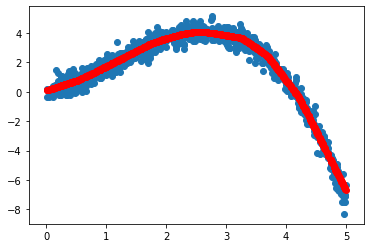

In [46]:
y_hat = Net2(x)
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

In [47]:
print(Net2.Layer2.weight.data)
print(Net2.Layer2.bias.data)

tensor([[-3.8699e-02,  1.2476e-01,  4.1110e-41,  ..., -1.1265e-01,
         -9.1281e-02,  2.0508e-39],
        [-8.2429e-04, -6.6443e-02,  2.1633e-41,  ...,  2.8927e-02,
          7.2473e-03, -1.3817e-39],
        [-2.3229e-07, -2.9002e-07, -2.5932e-41,  ..., -2.1120e-07,
          7.6754e-08, -4.3515e-41],
        ...,
        [ 1.2937e-02,  1.3044e-02,  3.3271e-41,  ...,  2.1542e-02,
          1.5218e-02,  5.2295e-40],
        [-2.3174e-26, -7.7653e-26,  1.0117e-42,  ..., -3.6671e-25,
         -3.0065e-25, -7.4423e-42],
        [-3.3416e-06, -1.1286e-06,  5.3691e-41,  ..., -5.0866e-06,
          7.8723e-08,  5.5646e-41]])
tensor([-1.3012e-01,  2.3783e-02, -7.1641e-08,  4.7059e-02,  1.8960e-42,
        -1.4054e-01,  7.5944e-04, -1.9094e-01, -4.9907e-04, -3.9842e-07,
        -1.3295e-01,  2.4264e-06,  4.6942e-02, -1.0907e-15,  5.2915e-02,
         2.0936e-02, -4.9921e-36,  2.9484e-03, -2.6042e-03, -5.9268e-19,
        -1.2089e-04, -1.2897e-01,  4.7629e-03,  2.3787e-02, -1.5061e-01,
   

In [48]:
'''How can we initialize the weights?'''

Net2.Layer2.weight.data = torch.ones((Net2.Layer2.weight.data.shape))

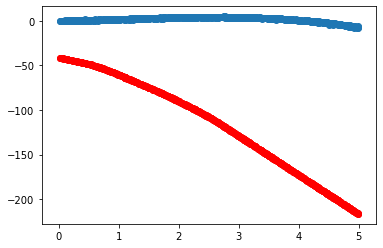

In [49]:
y_hat = Net2(x)
plt.scatter(x,y)
plt.scatter(x, y_hat.detach(), c = "red")

In [50]:
Net2.Layer1.weight.grad

tensor([[ 5.3058e-02],
        [-1.9777e-01],
        [ 0.0000e+00],
        [-1.2715e-01],
        [-1.5684e-01],
        [ 1.4029e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.8572e-01],
        [ 1.2388e-01],
        [ 1.8313e-01],
        [ 7.7635e-02],
        [ 6.0156e-03],
        [-1.1458e-08],
        [ 9.2730e-02],
        [ 0.0000e+00],
        [ 1.0596e-01],
        [ 0.0000e+00],
        [-2.0849e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.9598e-02],
        [ 0.0000e+00],
        [ 6.4826e-02],
        [ 0.0000e+00],
        [ 1.4331e-01],
        [-2.5712e-02],
        [-7.9117e-02],
        [-2.5285e-03],
        [-8.5501e-02],
        [-8.3179e-02],
        [-1.3288e-01],
        [ 5.0149e-02],
        [ 8.3477e-04],
        [-8.0944e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.5720e-22],
        [-1.3464e-01],
        [-9.1679e-11],
        [ 1.2030e-01],
        [ 1.7926e-01],
        [-1.8044e-01],
        [ 0

# Review 

- Architecture: 
    - implement __init__ and forward methods in a subclass of nn.Module
    - Use nonlinearities either with F.relu, F.sigmoid, F.tanh etc.. or nn.ReLU, nn.Sigmoid etc...
    - check the dimensions of the layers
    - Your layers can be linear, convolutional, etc...

- Data types and preparation 
- Torch tensors, float(), long() depending on the application and loss functions.
- Dataset class can be feed to a dataloader which allows us to train by mini-batches

- Define a loss functions or use the ones provided by pytorch
- loss.backward() computes the gradients

- Define and optimizers (yours or provided by pytorch), optimizer step performs on gradient descent step
